# Alejandro Jesús Manotas Marmolejo
# Código: 200108289

---



In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Sklearn imports
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter

# Metrics
from sklearn import metrics

# 1. Clustering D31 Dataset

## K-means

In [2]:
# Importing the dataset
dataset = pd.read_excel('D31_data.xlsx',header=None,names=['X','Y'])
X = dataset.values
dataset.head()

,X,Y
0,25.0514,5.7475
1,26.6614,7.3414
2,25.2653,6.2466
3,25.2285,4.7447
4,25.7529,5.1564


C:\Users\alejo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


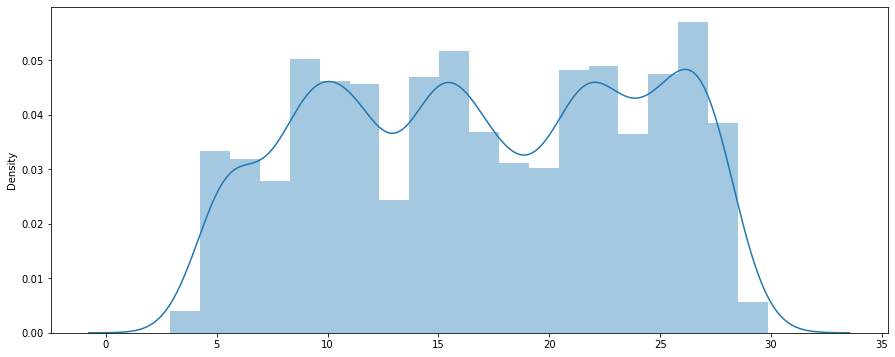

In [3]:
# Exploration analysis
plt.figure(1, figsize =(15, 6))
sns.distplot(dataset, bins = 20)
plt.show()

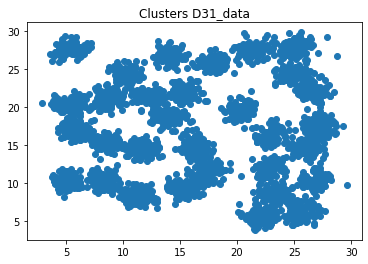

In [4]:
# Visualizing the dataset
plt.scatter(x='X', y='Y', data=dataset)
plt.title('Clusters D31_data')
plt.show()

In [5]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(X)

In [6]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
kmeans.cluster_centers_

array([[22.54271595, 11.26400085],
       [ 9.13512082, 17.39145153],
       [20.9120731 , 24.4081132 ]])

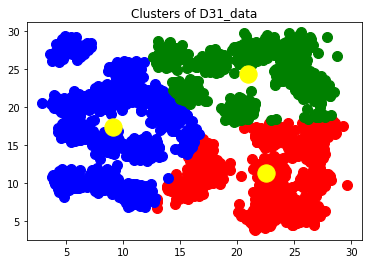

In [8]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of D31_data')
plt.show()

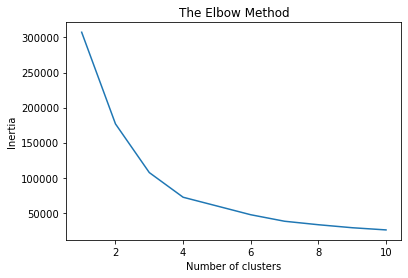

In [9]:
# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 69)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
# Fitting K-Means to the dataset with k=5
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(X)

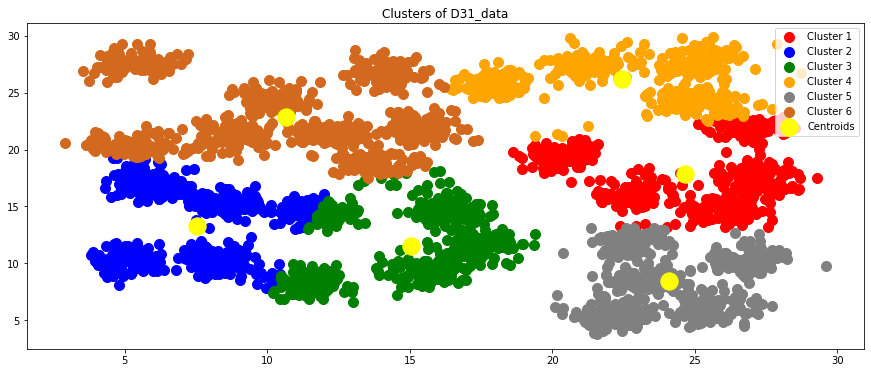

In [11]:
# Visualizing the clusters
plt.figure(1, figsize =(15, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'gray', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'chocolate', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of D31_data')
plt.legend()
plt.show()

## DBSCAN

In [12]:
# Importing the dataset
data = pd.read_excel('D31_data.xlsx',header=None,names=['X','Y'])
Y = data.values
Y = StandardScaler().fit_transform(Y)

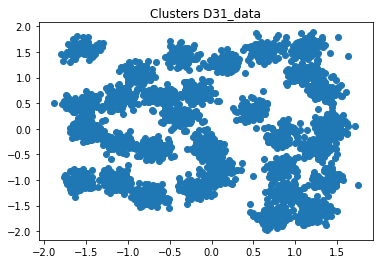

In [13]:
# Visualizing the dataset
plt.scatter(Y[:,0], Y[:,1])
plt.title('Clusters D31_data')
plt.show()

In [14]:
# Fitting K-Means to the dataset
dbscan = DBSCAN(eps=0.1, min_samples=5)
model = dbscan.fit(Y)

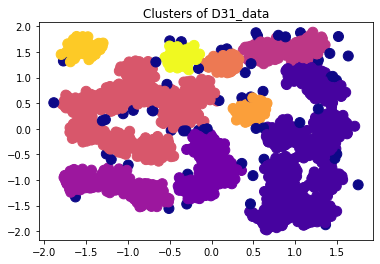

In [15]:
# Visualizing the clusters
y_dbscan = dbscan.fit_predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters of D31_data')
plt.show()

In [16]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Y)
distances, indices = nbrs.kneighbors(Y)

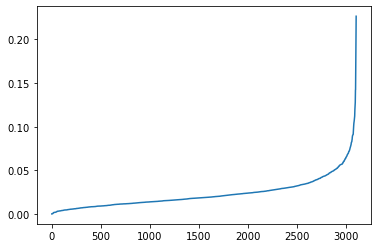

In [17]:
# Sort and view
distances = np.sort(distances, axis=0)
plt.plot(distances[:,1])
plt.show()

In [18]:
# Fitting K-Means to the dataset with eps = 0.10
dbscan = DBSCAN(eps=0.10, min_samples=5)
model = dbscan.fit(Y)

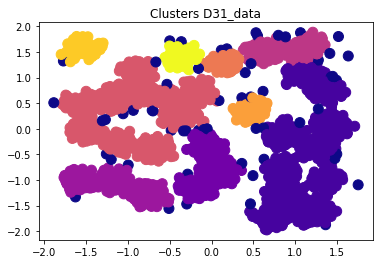

In [19]:
y_dbscan = dbscan.fit_predict(Y)
plt.scatter(Y[:, 0], Y[:, 1], s = 100, c = y_dbscan, cmap='plasma')
plt.title('Clusters D31_data')
plt.show()

## Comparison between DBSCAN and K-Means

In [20]:
# Comparison between K-Means and DBSCAN
labels = dbscan.labels_
labels2 = kmeans.labels_
print('Silhouette coefficient DBSCAN: %0.3f' % metrics.silhouette_score(Y,labels))
print('Silhouette coefficient K-Means: %0.3f' % metrics.silhouette_score(X,labels2))

Silhouette coefficient DBSCAN: 0.213
Silhouette coefficient K-Means: 0.421


## Conclusión

Comparando los coeficientes, se tiene que el K-means ofrece un coeficiente mayor a comparación del DBSCAN, a pesar de que en el DBSCAN se utiliza un epsilon optimo el coeficiente sigue siendo menor.

# 2. Clustering Fifa Players

In [21]:
fifa = pd.read_csv('data.csv')
fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Age and potential

In [22]:
#Columns 3 = age, 6 = Potential
Z = fifa.iloc[:, [3,6]].values

In [23]:
Z

array([[31, 94],
       [33, 94],
       [26, 93],
       ...,
       [16, 67],
       [17, 66],
       [16, 66]], dtype=int64)

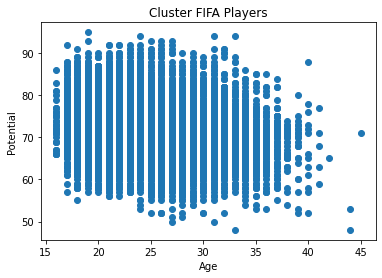

In [24]:
# Plotting Age vs Potential
plt.scatter(Z[:,0],Z[:,1])
plt.title('Cluster FIFA Players')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

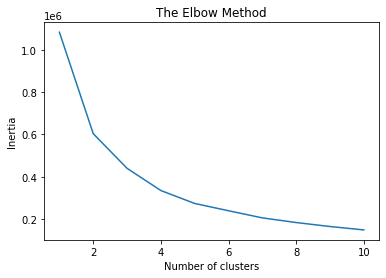

In [25]:
# Using the elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 69)
    kmeans.fit(Z)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# Fitting K-Means to the dataset with k=4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(Z)

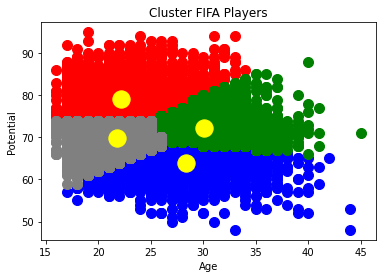

In [27]:
# Visualizing the clusters
plt.scatter(Z[y_kmeans == 0, 0], Z[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Z[y_kmeans == 1, 0], Z[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Z[y_kmeans == 2, 0], Z[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Z[y_kmeans == 3, 0], Z[y_kmeans == 3, 1], s = 100, c = 'gray', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster FIFA Players')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

In [28]:
print('Silhouette coefficient K-means: %0.3f' % metrics.silhouette_score(Z, kmeans.labels_))

Silhouette coefficient K-means: 0.353


## Age, Overall, Potential, Value, Skill Moves, Height and Weak Foot

In [29]:
# Erase €, M and K simbols and convert it into a float value
def currency_transform(amount):
    if "M" in amount:
        amount = amount.replace('M', '')
        amount = amount.replace('€', '')
        amount = float(amount) * 1e+6
    else:
        amount = amount.replace('K', '')
        amount = amount.replace('€', '')
        amount = float(amount) * 1e+3
    return amount

fifa.loc[:, "Value"] = fifa['Value'].apply(lambda value: currency_transform(value))

In [30]:
# Convert feet to meters and convert it into a float value
def height_transform(height):
    if type(height) != float:
      lst = list(height)
      lst[1] = '.'
      lst = ''.join(lst)
      height = float(lst)
      return height/3.281

fifa.loc[:, 'Height'] = fifa['Height'].apply(lambda height: height_transform(height))

In [31]:
# See changes in Dataframe
fifa.head()

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [32]:
# Erase nan rows and capture the columns we need
fifa.dropna(subset = ['Age','Overall', 'Potential', 'Value', 'Skill Moves', 'Height', 'Weak Foot'], axis=0,inplace=True)
A = fifa.iloc[:, [3,5,6,8,12,13,11]].values

In [33]:
#Ajustamos el modelo
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(A)

In [34]:
# See numbers of clusters
labels = kmeans.labels_
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
print('Number of clusters: %0.0f' % n_clusters_)
print('Number of total groups: %0.0f' % len(Counter(labels).keys()))

Number of clusters: 5
Number of total groups: 5


In [35]:
print('Silhouette coefficient K-means: %0.3f' % metrics.silhouette_score(A, labels))

Silhouette coefficient K-means: 0.780


## Conclusiones

Utilizando K-means solo para dos features provee un coeficiente mucho menor que cuando se utilizan siete features. Utilizando dos obtenenemos un coeficiente de 0.353 mientras que utilizando siete features obtenemos un coeficiente de 0.780.